In [153]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import plot_model
import numpy as np 
import pandas as pd
import os
import time 
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tensorflow.keras.models import Model
from sklearn.cluster import DBSCAN

In [96]:
x_train=pd.read_csv("x_train.csv").values

In [97]:
y_train=pd.read_csv("y_train.csv").values

In [98]:
y_test=pd.read_csv("y_test.csv").values

In [99]:
x_test=pd.read_csv("x_test.csv").values

Question 1 Default Model

In [100]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255.0

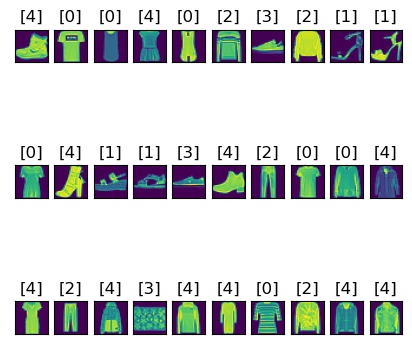

In [101]:
fig, ax = plt.subplots(3,10, figsize=(5, 5))
ax = ax.flatten()
for i in range(30):
    ax[i].imshow(x_train[i])
    ax[i].set_title(y_train[i])
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()

In [102]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=5)

In [103]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), strides=(1,1), padding='same', activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), strides=(1,1), padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5,activation='softmax') 
])

In [104]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 5)                 31365     
                                                                 
Total params: 40,933
Trainable params: 40,933
Non-trainable params: 0
__________________________________________________

In [105]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [106]:
model1=model.fit(x_train,y_train, epochs=20,batch_size=32,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.6314 - accuracy: 0.7522 - val_loss: 0.4667 - val_accuracy: 0.8255
Epoch 2/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.4172 - accuracy: 0.8471 - val_loss: 0.3982 - val_accuracy: 0.8545
Epoch 3/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.3683 - accuracy: 0.8673 - val_loss: 0.3532 - val_accuracy: 0.8716
Epoch 4/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.3388 - accuracy: 0.8785 - val_loss: 0.3338 - val_accuracy: 0.8791
Epoch 5/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.3180 - accuracy: 0.8867 - val_loss: 0.3118 - val_accuracy: 0.8873
Epoch 6/20
1500/1500 [==============================] - 20s 14ms/step - loss: 0.3024 - accuracy: 0.8926 - val_loss: 0.2956 - val_accuracy: 0.8947
Epoch 7/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2888 - accuracy: 0.8972 - val_loss: 0.2936 -

In [107]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss}, Test accuracy: {test_acc}")

313/313 [==============================] - 2s 5ms/step - loss: 0.2490 - accuracy: 0.9115
Test loss: 0.24902629852294922, Test accuracy: 0.9114999771118164


Question 2 : Own model

In [108]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [109]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 14, 14, 64)      

In [110]:
model2= model.fit(x_train,y_train, epochs=25,batch_size=64, validation_split=0.2,verbose=1)

Epoch 1/25
750/750 [==============================] - 57s 74ms/step - loss: 0.5303 - accuracy: 0.8092 - val_loss: 0.2838 - val_accuracy: 0.8956
Epoch 2/25
750/750 [==============================] - 58s 77ms/step - loss: 0.3207 - accuracy: 0.8823 - val_loss: 0.2271 - val_accuracy: 0.9162
Epoch 3/25
750/750 [==============================] - 57s 77ms/step - loss: 0.2769 - accuracy: 0.8991 - val_loss: 0.2352 - val_accuracy: 0.9102
Epoch 4/25
750/750 [==============================] - 58s 77ms/step - loss: 0.2533 - accuracy: 0.9074 - val_loss: 0.1914 - val_accuracy: 0.9302
Epoch 5/25
750/750 [==============================] - 55s 73ms/step - loss: 0.2358 - accuracy: 0.9143 - val_loss: 0.1883 - val_accuracy: 0.9320
Epoch 6/25
750/750 [==============================] - 56s 74ms/step - loss: 0.2233 - accuracy: 0.9200 - val_loss: 0.1921 - val_accuracy: 0.9325
Epoch 7/25
750/750 [==============================] - 55s 73ms/step - loss: 0.2133 - accuracy: 0.9228 - val_loss: 0.1806 - val_accuracy:

In [111]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss}, Test accuracy: {test_acc}")

313/313 [==============================] - 3s 9ms/step - loss: 0.1545 - accuracy: 0.9466
Test loss: 0.15450994670391083, Test accuracy: 0.9466000199317932


Question 3 Summary

Cooment on runtime and testing accuracy,tesing loss 

In [112]:
from tabulate import tabulate
default_val_acc = model1.history['val_accuracy'][-1]
default_train_acc=model1.history['accuracy'][-1]
default_val_loss=model1.history['val_loss'][-1]
default_train_loss=model1.history['loss'][-1]
own_val_acc = model2.history['val_accuracy'][-1]
own_train_acc=model2.history['accuracy'][-1]
own_val_loss=model2.history['val_loss'][-1]
own_train_loss=model2.history['loss'][-1]


data = [
    ["Default Model", default_train_acc, default_val_acc,default_train_loss, default_val_loss],
    ["Your Model", own_train_acc, own_val_acc,own_train_loss, own_val_loss]
]

table = tabulate(data, headers=["Model Name", "Training Accuracy", "Validation Accuracy","Training Loss" , "Validation Loss"], tablefmt="fancy_grid")

print(table)

╒═══════════════╤═════════════════════╤═══════════════════════╤═════════════════╤═══════════════════╕
│ Model Name    │   Training Accuracy │   Validation Accuracy │   Training Loss │   Validation Loss │
╞═══════════════╪═════════════════════╪═══════════════════════╪═════════════════╪═══════════════════╡
│ Default Model │            0.928896 │              0.918083 │        0.201025 │          0.226065 │
├───────────────┼─────────────────────┼───────────────────────┼─────────────────┼───────────────────┤
│ Your Model    │            0.948792 │              0.9495   │        0.140417 │          0.143639 │
╘═══════════════╧═════════════════════╧═══════════════════════╧═════════════════╧═══════════════════╛


In [113]:
from tabulate import tabulate
headers = ["Model","Total Parameters" ,"Trainable Parameters", "Non-trainable Parameters"]
rows = [
    ["Default Model",40933,40933,0],
    ["OWN Model",391045,390085,960]  
]
print(tabulate(rows, headers))

Model            Total Parameters    Trainable Parameters    Non-trainable Parameters
-------------  ------------------  ----------------------  --------------------------
Default Model               40933                   40933                           0
OWN Model                  391045                  390085                         960


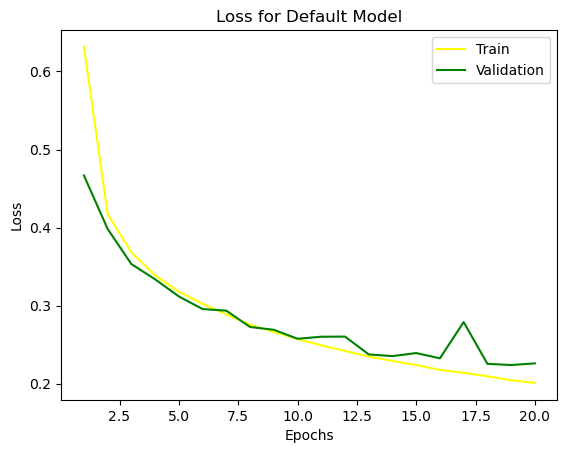

In [114]:
epochs = range (1,21)
plt.plot(epochs,model1.history['loss'],color='yellow', label='Train')
plt.plot(epochs, model1.history['val_loss'],color='Green', label='Validation')
plt.title('Loss for Default Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

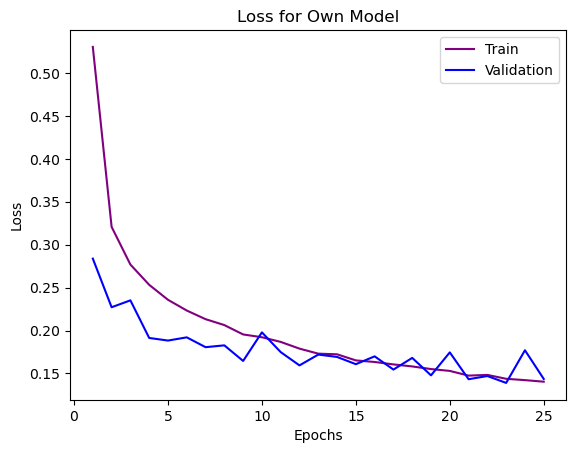

In [115]:
epochs = range (1,26)
plt.plot(epochs,model2.history['loss'],color='purple', label='Train')
plt.plot(epochs, model2.history['val_loss'],color='blue', label='Validation')
plt.title('Loss for Own Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

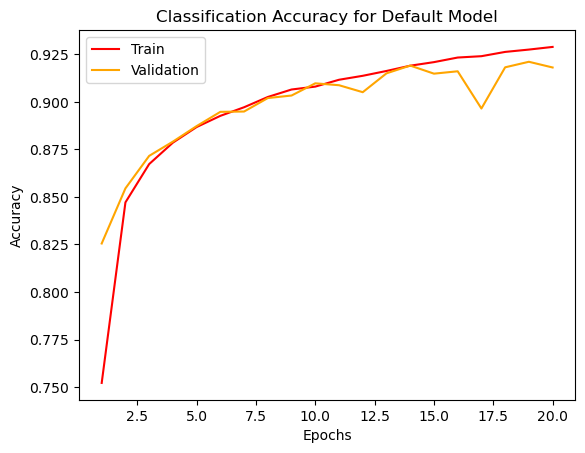

In [116]:
epochs = range (1,21)
plt.plot(epochs,model1.history['accuracy'],color='red', label='Train')
plt.plot(epochs, model1.history['val_accuracy'],color='orange', label='Validation')
plt.title('Classification Accuracy for Default Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

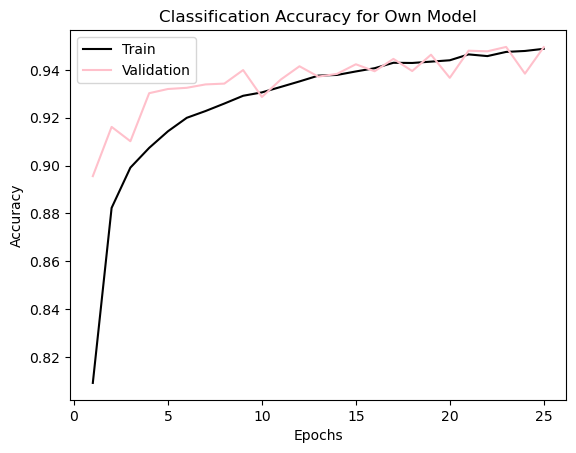

In [117]:
epochs = range (1,26)
plt.plot(epochs,model2.history['accuracy'],color='black', label='Train')
plt.plot(epochs, model2.history['val_accuracy'],color='pink', label='Validation')
plt.title('Classification Accuracy for Own Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [118]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
precision, recall, f1_score, _ = precision_recall_fscore_support(np.argmax(y_test, axis=1), y_pred, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1_score)

313/313 [==============================] - 3s 9ms/step
Precision: 0.9464803348283866
Recall: 0.9466
F1 score: 0.9464988747138288


Question 4

In [119]:
keras_function = keras.backend.function([model.input], [model.layers[10].output])
train_encodes = keras_function(x_train)
train_encodes_array = train_encodes[0].reshape(len(x_train), -1)
df_train = pd.DataFrame(train_encodes_array)
test_encodes = keras_function(x_test)
test_encode_array = test_encodes[0].reshape(len(x_test), -1)
df_test = pd.DataFrame(test_encode_array)
pca = PCA(n_components=2)
pca_train = pca.fit_transform(df_train)
pca_test = pca.transform(df_test)

Text(0.5, 1.0, 'PCA plot with colored clusters based on target names')

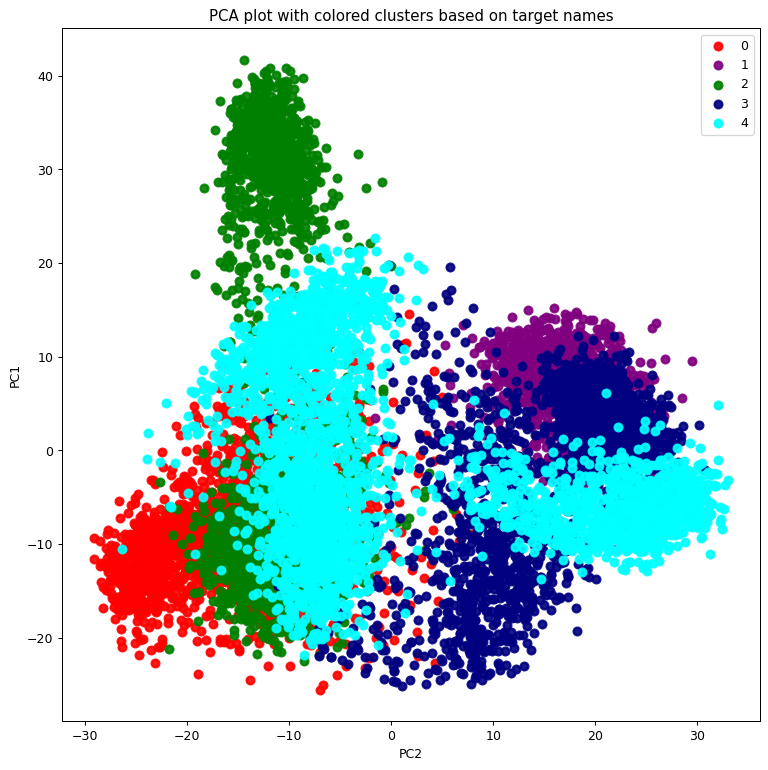

In [132]:
plt.figure(figsize=(10, 10), dpi=90)
colors = ["red", "purple", "green", "navy", "cyan"]
lw = 2
target_names = [0, 1, 2, 3, 4]
for i, color, tn in zip(range(len(target_names)), colors, target_names):
    plt.scatter(
        pca_test[df_y == i, 0],
        pca_test[df_y == i, 1],
        color=color,
        alpha=0.9,
        lw=lw,
        label=tn,
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("PC2")
plt.ylabel("PC1")
plt.title("PCA plot with colored clusters based on target names")


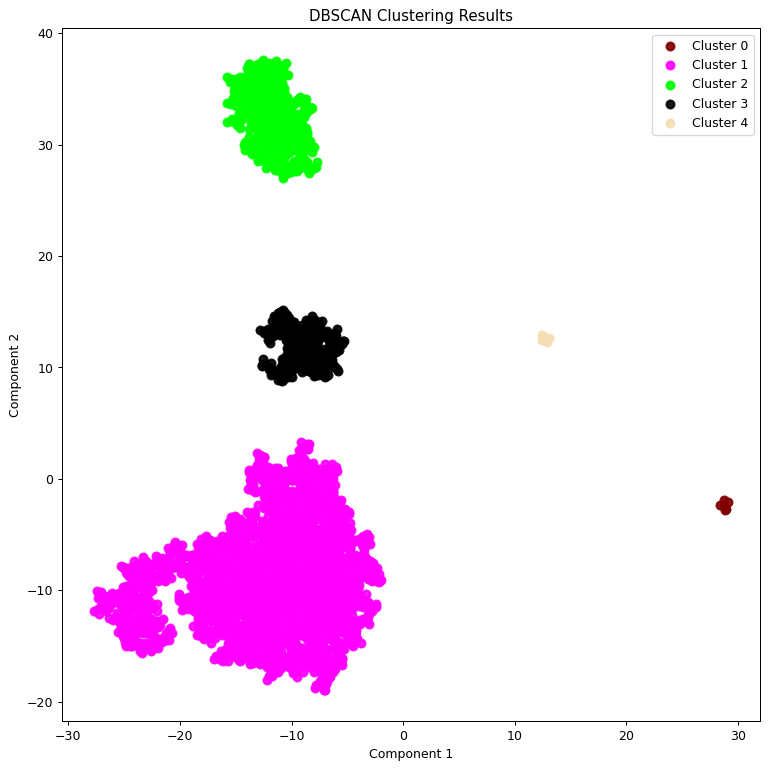

In [168]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(pca_test)
plt.figure(figsize=(10, 10), dpi=90)
colors = ["maroon", "magenta", "lime", "black", "wheat"]
for i, color in enumerate(colors):
    plt.scatter(
        pca_test[labels == i, 0], pca_test[labels == i, 1], color=color, alpha=0.9, lw=2, label=f"Cluster {i}"
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("DBSCAN Clustering Results")
plt.show()

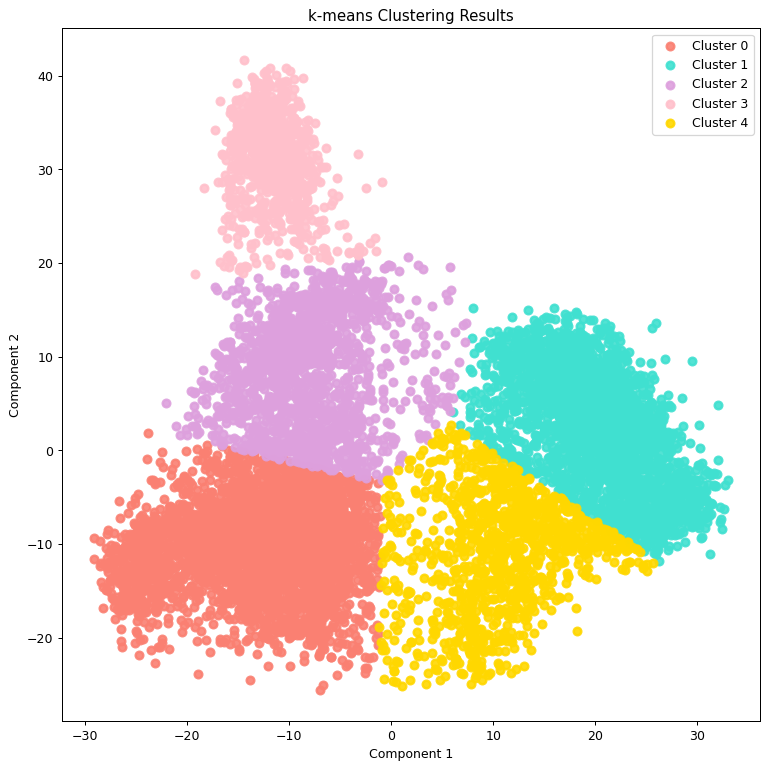

In [167]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(pca_test)
plt.figure(figsize=(10, 10), dpi=90)
colors = ["salmon", "turquoise", "plum", "pink", "gold"]
for i, color in enumerate(colors):
    plt.scatter(
        pca_test[labels == i, 0], pca_test[labels == i, 1], color=color, alpha=0.9, lw=2, label=f"Cluster {i}"
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("k-means Clustering Results")
plt.show()

In [161]:
tsne=TSNE(n_components=2,perplexity=30, random_state=42)
tsne_test=tsne.fit_transform(df_test)

Text(0.5, 1.0, 't-SNE')

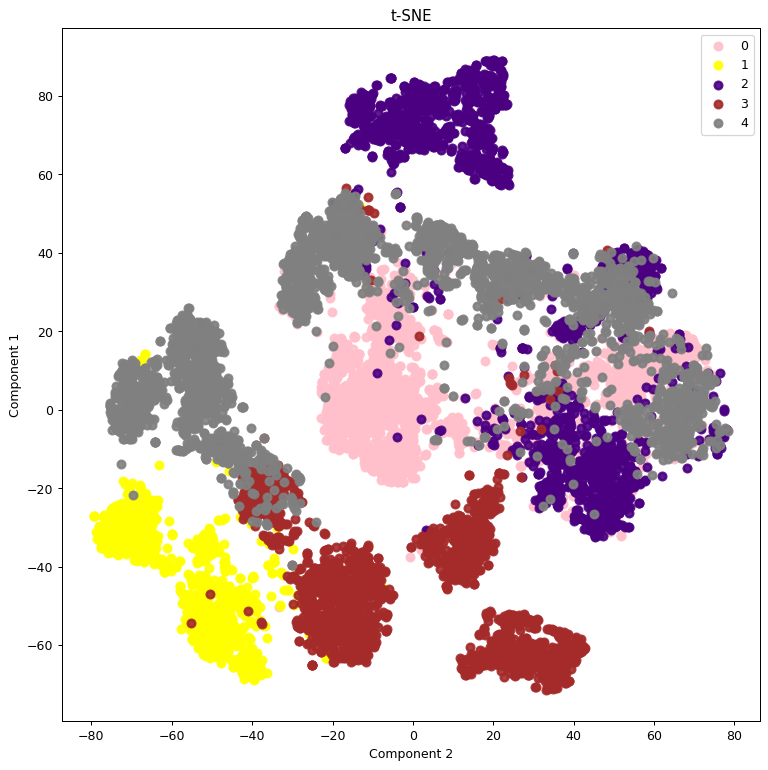

In [162]:
plt.figure(figsize=(10, 10), dpi=90)
colors = ["pink","yellow","indigo","brown","grey"]
lw = 2
target_names = [0,1,2,3,4]
for color, i, tn in zip(colors, [0,1,2,3,4], target_names):
    plt.scatter(
        tsne_test[df_y == i, 0], tsne_test[df_y == i, 1], color=color, alpha=0.9, lw=lw,label = tn
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("Component 2")
plt.ylabel("Component 1")
plt.title("t-SNE")

In [172]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
train_cluster_labels = dbscan.fit_predict(X_train)
test_cluster_labels = dbscan.fit_predict(X_test)

unique_labels = np.unique(train_cluster_labels)

for label in unique_labels:
    train_cluster_data = X_train[train_cluster_labels == label]
    test_cluster_data = X_test[test_cluster_labels == label]
    random_train_data = np.random.choice(train_cluster_data.flatten(), size=5, replace=False)
    random_test_data = np.random.choice(test_cluster_data.flatten(), size=5, replace=False)
    train_label_data = y_train[train_cluster_labels == label]
    test_label_data = y_test[test_cluster_labels == label]
    if train_label_data.size == 0:
        train_label_data = np.array(['None'])
    else:
        train_label_data = train_label_data[:5]
    if test_label_data.size == 0:
        test_label_data = np.array(['None'])
    else:
        test_label_data = test_label_data[:5]
    print(f"Cluster {label}:")
    print(f"Train Data: {random_train_data}, Labels: {train_label_data}")
    print(f"Test Data: {random_test_data}, Labels: {test_label_data}")

IndexError: boolean index did not match indexed array along dimension 0; dimension is 60000 but corresponding boolean dimension is 100